In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d
from scipy.linalg import inv, solve, det, eig

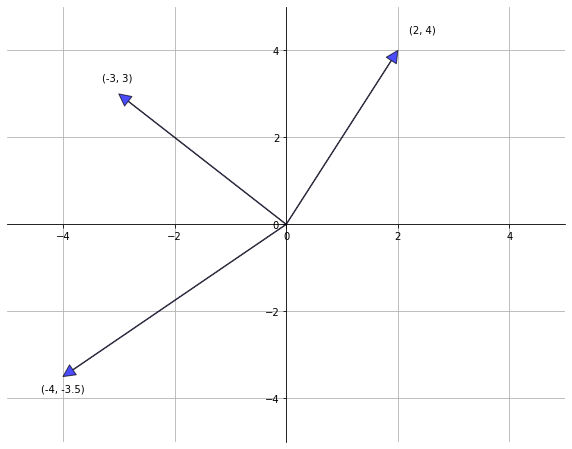

In [2]:
fig, ax = plt.subplots(figsize=(10, 8))
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right','top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.grid()
vecs = ((2, 4), (-3, 3), (-4, -3.5))
for v in vecs:
    ax.annotate("", xy=v, xytext=(0, 0),
    arrowprops=dict(facecolor='blue',
    shrink=0,
    alpha=0.7,
    width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))
plt.show()

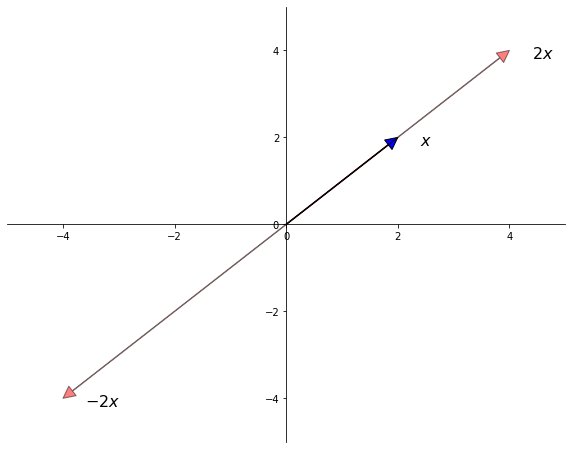

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
ax.set(xlim=(-5, 5), ylim=(-5, 5))
x = (2, 2)
ax.annotate("", xy=x, xytext=(0, 0),
    arrowprops=dict(facecolor='blue',
    shrink=0,
    alpha=1,
    width=0.5))
ax.text(x[0] + 0.4, x[1] - 0.2, '$x$', fontsize='16')

scalars = (-2, 2)
x = np.array(x)

for s in scalars:
    v = s * x
    ax.annotate("", xy=v, xytext=(0, 0),
    arrowprops=dict(facecolor='red',
    shrink=0,
    alpha=0.5,
    width=0.5))
    ax.text(v[0] + 0.4, v[1] - 0.2, f'${s} x$', fontsize='16')

plt.show()

In [4]:
x = np.ones(3)
y = np.array((2, 4, 6))
x + y

array([3., 5., 7.])

In [5]:
4 * x

array([4., 4., 4.])

In [6]:
np.sum(x * y)

12.0

In [7]:
np.sqrt(np.sum(x**2))

1.7320508075688772

In [8]:
np.linalg.norm(x)

1.7320508075688772

In [9]:
A = ((1, 2),
(3, 4))

In [10]:
type(A)

tuple

In [11]:
A = np.array(A)

In [12]:
type(A)

numpy.ndarray

In [13]:
A.shape

(2, 2)

In [14]:
A = np.identity(3)
B = np.ones((3, 3))
2 * A

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [15]:
A + B

array([[2., 1., 1.],
       [1., 2., 1.],
       [1., 1., 2.]])

In [16]:
A @ B

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [17]:
A * B

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

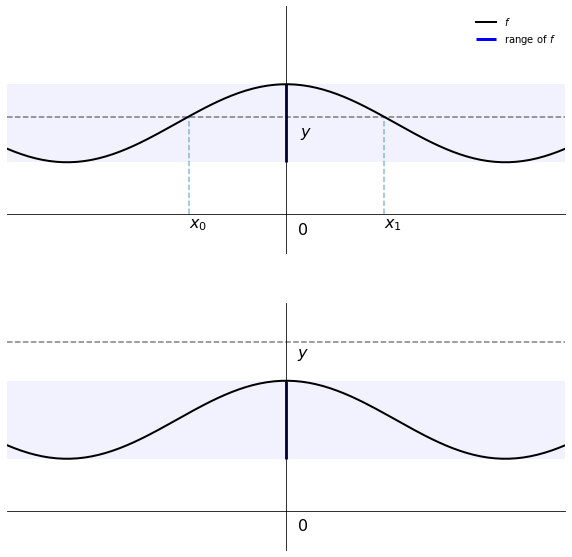

In [18]:
def f(x):
    return 0.6 * np.cos(4 * x) + 1.4

xmin, xmax = -1, 1
x = np.linspace(xmin, xmax, 160)
y = f(x)
ya, yb = np.min(y), np.max(y)
fig, axes = plt.subplots(2, 1, figsize=(10,10))

for ax in axes:
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position("zero")
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.set(ylim=(-0.6, 3.2), xlim=(xmin, xmax), yticks=(), xticks=())
    ax.plot(x, y, 'k-', lw=2, label='$f$')
    ax.fill_between(x, ya, yb, facecolor='blue', alpha=0.05)
    ax.vlines([0], ya, yb, lw=3, color='blue', label='range of $f$')
    ax.text(0.04, -0.3, '$0$', fontsize=16)

ax = axes[0]
ax.legend(loc='upper right', frameon=False)
ybar = 1.5
ax.plot(x, x * 0 + ybar, 'k--', alpha=0.5)
ax.text(0.05, 0.8 * ybar, '$y$', fontsize=16)
for i, z in enumerate((-0.35, 0.35)):
    ax.vlines(z, 0, f(z), linestyle='--', alpha=0.5)
    ax.text(z, -0.2, f"$x_{i}$", fontsize=16)

ax = axes[1]

ybar = 2.6
ax.plot(x, x * 0 + ybar, "k--", alpha=0.5)
ax.text(0.04, 0.91 * ybar, '$y$', fontsize=16)
plt.show()

In [19]:
A = ((1, 2), (3, 4))
A = np.array(A)
y = np.ones((2, 1))
det(A)

-2.0

In [20]:
A_inv = inv(A)

In [21]:
x = A_inv @ y
A @ x

array([[1.],
       [1.]])

In [22]:
solve(A, y)

array([[-1.],
       [ 1.]])

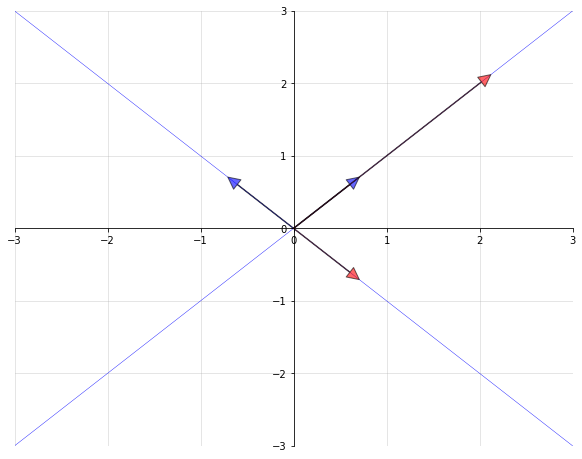

In [25]:
# 设置目标的初始参数
A = ((1, 2), (2, 1))
A = np.array(A)
evals, evecs = eig(A)
evecs = evecs[:, 0], evecs[:, 1]

# 设置画布的初始参数
fig, ax = plt.subplots(figsize=(10, 8))
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
ax.grid(alpha=0.4)

# 设置坐标轴的初试参数
xmin, xmax = -3, 3
ymin, ymax = -3, 3
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# 设置向量，特征向量
for v in evecs:
    ax.annotate("", xy=v, xytext=(0,0),
    arrowprops=dict(facecolor='blue',
    shrink=0, 
    alpha=0.6,
    width=0.5))

# 设置向量，原始矩阵乘特征向量
for v in evecs:
    v = A @ v
    ax.annotate("", xy=v, xytext=(0,0),
    arrowprops=dict(facecolor='red',
    shrink=0, 
    alpha=0.6,
    width=0.5))

# 画图，蓝色的直线表示方向
x = np.linspace(xmin, xmax, 3)
for v in evecs:
    a = v[1] / v[0]
    ax.plot(x, a * x, 'b-', lw=0.4)

# 展示图片
plt.show()

In [26]:
A = ((1, 2), (2, 1))
A = np.array(A)
evals, evecs = eig(A)
evals # 两个特征值

array([ 3.+0.j, -1.+0.j])

In [27]:
evecs # 两个特征向量

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])